# How to use the parameters in Neural-Networks


Today I will discuss about how to adjust the parameters of the neural networks from unknonwn Neural Networks.



In ordering to select the appropiate parameters in a simple Neural Network for example in case of a Convolutional  Neural Network , we should remember the meaning of all the layers and understand the 
the following parameters:

- Activation Shape
- Activation Size 
- Parameters

# Analysis of Neural Networks

To build the neural network, we should know the dimensions of the layers that are include in the network.

In this work we will use three types of layers in a convolution
- Convolution (CONV)
- Pooling  (POOL) 
- Fully connected (FC)

### Parameters in Convolution Neural Networks (CNNs)

To understand better the layers we have to understand the parameters involved in the layers.

Let us define several helper functions that allow us understand how the Neural Networks works and use.

## Convolution (CONV)

In [10]:
def dim_valid_convolution(inputs,  kernel):
    '''
    input
    nh : height
    nw : widht
    
    kernel
    fh : filter
    fw : filter
    '''
    nh,nw,= inputs
    fh,fw = kernel
    return (nh-fh) + 1, (nw-fw) + 1

In [11]:
inputs = 6 , 6  # nxn image
filters = 3 , 3 # fxf filter
dim_valid_convolution( inputs, filters)

(4, 4)

In [12]:
def dim_same_convolution(inputs,  kernel,s,p):
    '''
    Output size is the same as input size
    
    input
    nh : height
    nw : widht
    
    kernel
    fh : filter
    fw : filter
    '''
    nh,nw,= inputs
    fh,fw = kernel
    return (nh+2*p-fh) + 1, (nw+2*p-fw) + 1

We choose pad in a way that the output size is the same as the input size

In [13]:
inputs = 6 , 6  # nxn image
filters = 3 , 3 # fxf filter
stride=1.0    #stride s
padding=1.0   # padding s
parameters=dim_same_convolution( inputs, filters,stride,padding)


In [14]:
def check_same(inputs,parameters):
    #2D
    if len(parameters)==2 :
        assert parameters[0] == inputs[0] and  parameters[1] ==inputs[1],"It is not same convolution, please fix the stride or padding for the input"+str(inputs)+"and parameters "+str(parameters)      
    #3D    
    if len(parameters)==3 :
        assert parameters[0][0] == inputs[0] and  parameters[0][1] ==inputs[1],"It is not same convolution, please fix the stride or padding for the input"+str(inputs)+"and parameters "+str(parameters)

In [15]:
check_same(inputs,parameters)

![strided](img/strided.jpg)

In [16]:
def dim_strided_convolution(inputs, kernel ,s,p):
    '''
    input = (nh, nw)
    nh : height
    nw : widht
    
    kernel = (fh, fw)
    fh : filter height
    fw : filter widht

    p : padding
    s : stride

    '''
    nh,nw= inputs
    fh,fw= kernel
    
    
    print("Activation Shape Strided")

    
    return (nh+2*p-fh)/s + 1, (nw+2*p-fw)/s + 1

In [17]:
inputs = 7,7  # nxn image
kernel = 3,3  # fxf filter
stride=2.0    #stride s
padding=0.0   # padding s
dim_strided_convolution(inputs, kernel ,stride,padding)

Activation Shape Strided


(3.0, 3.0)

In [18]:
def dim_rgb_convolution(inputs, kernel,stride,padding,filters):
    '''
    input = (nh, nw, nc)
    where 
    nh: height
    nw: widht
    nc: channels
    
    output = (nhl,nwl,ncl)
       
    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    ncl = filters
    
    
    where
       fw,fh : filter sizes
       p : padding
       s : stride  
    ncl  : filters
    
    '''
    nh,nw,nc = inputs
    fh,fw = kernel
     
    s        = stride
    p        = padding
    ncl      = filters

    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    output = (int(nhl),int(nwl),int(ncl))
    
    
    
    print("Activation Shape")


    return output

Let us define the number of parameters used in each convolution,
The paremeters are defined as  ((shape of width of filter x shape of height filter x number of filters in the previous layer+1) x number of filters) 

In [19]:
def nparameters_convolution(inputs, kernel,stride,padding,filters):
    '''
    input = (nh, nw, nc)
    where 
    nh: height
    nw: widht
    nc: channels
    
    activation_shape  = (nhl,nwl,ncl)
       
    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    ncl = filters
    
    
    where
       fw,fh : filter sizes
       p : padding
       s : stride  
    ncl  : filters
    
    '''
    nh,nw,nc = inputs
    fh,fw = kernel
     
    s        = stride
    p        = padding
    ncl      = filters
    
    #activation shape 
    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    activation_shape = (int(nhl),int(nwl),int(ncl))
    
    # activation size
    activation_size=int(nhl)*int(nwl)*int(ncl)
    
    
    # number Parameters
    nparameters=((fh*fw*nc)+1)*ncl
    
    print("Activation Shape,", "Activation Size,","# Parameters")
     
    return   activation_shape ,  activation_size, nparameters

In [20]:
inputs  = 32,32,3  #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 8       #number of filters ncl



nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((28, 28, 8), 6272, 608)

![convnet](img/convnet.jpg)

In [21]:
inputs  = 39,39,3  #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 10       #number of filters ncl

dim_rgb_convolution(inputs, kernel,stride,padding,filters)

Activation Shape


(37, 37, 10)

Where  the activation size, considering it’s merely the product of width, height and the number of channels in that layer.

The input layer’s shape is (37, 37, 10), the activation size of that layer is 37* 37* 10 = 13690

In [22]:
37* 37* 10 

13690

In [23]:
inputs  = 37,37,10  #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
filters = 20       #number of filters ncl


dim_rgb_convolution(inputs, kernel,stride,padding,filters)

Activation Shape


(17, 17, 20)

The sme happens if we want to calculate the activation size for this convolution. All we have to do is just multiply (17, 17, 20) , i.e 17* 17* 20= 5780 

In [24]:
17* 17* 20

5780

In [25]:
inputs  = 17,17,20  #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
filters = 40       #number of filters ncl

dim_rgb_convolution(inputs, kernel,stride,padding,filters)

Activation Shape


(7, 7, 40)

In [26]:
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((7, 7, 40), 1960, 20040)

The number of parameters in a given layer is the count of “learnable”  elements for a filter aka parameters for the filter for that layer. Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process

## Pooling (POOL)

In the pooling there are the following Hyperparameters:

- f: filter size

- s: stride
- Max or average pooling

Given an input with the dimensions

$$n_H \times n_W \times n_C$$

Max or  pooling is has the following dimensions

$$ \frac{n_H+2p-f}{s}+1 \times \frac{n_W+2p-f}{s}+1 \times n_C$$ 

The numbers of channels remains $$n_C$$


In [27]:
def dim_pool(inputs, kernel,stride,padding):
    '''
    input = (nh, nw, nc)
    where 
    nh: height
    nw: widht
    nc: channels
    
    activation_shape  = (nhl,nwl,ncl)
       
    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    ncl = nc
    where
       fw,fh : filter sizes
       p : padding
       s : stride     
    '''
    nh,nw,nc = inputs
    fh,fw = kernel
     
    s        = stride
    p        = padding
    ncl      = nc

    nhl = (nh+2*p-fw)/s + 1
    nwl = (nw+2*p-fh)/s + 1
    activation_shape = (int(nhl),int(nwl),int(ncl))


    # activation size
    activation_size=int(nhl)*int(nwl)*int(ncl)
    
    
    # number Parameters
    nparameters=0
    
    print("Activation Shape,", "Activation Size,","# Parameters")
     
    return   activation_shape ,  activation_size, nparameters    


In [28]:
inputs  = 5,5,5 #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p

dim_pool(inputs, kernel,stride,padding)

Activation Shape, Activation Size, # Parameters


((3, 3, 5), 45, 0)

In [29]:
inputs  = 7,7,1000 #nw x nh x nc image
kernel  = 2,2      #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p


dim_pool(inputs, kernel,stride,padding)

Activation Shape, Activation Size, # Parameters


((3, 3, 1000), 9000, 0)

![convnet](img/lenet5.jpg)

The input layer’s shape is (32, 32, 3), the activation size of that layer is 32 * 32 * 3 = 3072.

### CONV 1

In [30]:
inputs  =32,32,3  #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 8 #6       #number of filters ncl

newinput=dim_rgb_convolution(inputs, kernel,stride,padding,filters)
newinput

Activation Shape


(28, 28, 8)

The activation size for CONV1. 

In [31]:
28* 28* 8

6272

Parameters  CONV1

```
((fw x fw *nc +1)*ncl)
```

In [32]:
(((5*5*3)+1)*8) 

608

In [33]:
inputs  =32,32,3  #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 8       #number of filters ncl

nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((28, 28, 8), 6272, 608)

### POOL 1

In [34]:
inputs  = 28, 28, 8 #nw x nh x nc 
kernel  = 2,2     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p

dim_pool(inputs, kernel,stride,padding)

Activation Shape, Activation Size, # Parameters


((14, 14, 8), 1568, 0)

The activation size for POOL1. 

In [35]:
14* 14* 8

1568

### CONV 2

In [36]:
inputs  =14, 14, 8 #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 16       #number of filters ncl

newinput=dim_rgb_convolution(inputs, kernel,stride,padding,filters)
newinput

Activation Shape


(10, 10, 16)

The activation size for CONV2. 

In [37]:
10*10*16 

1600

In [38]:
inputs  =14, 14, 8 #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 0.0      #padding p
filters = 16       #number of filters ncl


nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((10, 10, 16), 1600, 3216)

### POOL 2

In [39]:
inputs  = 10, 10, 16 #nw x nh x nc 
kernel  = 2,2     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p

dim_pool(inputs, kernel,stride,padding)

Activation Shape, Activation Size, # Parameters


((5, 5, 16), 400, 0)

The activation size for POOL2. 

In [40]:
5* 5* 16

400

Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process.

###  FULLY CONNECTED LAYER

To calculate the learnable parameters here, all we have to do is just multiply the by the shape of width hw, height hw, previous layer's filters nc and account for all such filters k in the current layer. Don't forget the bias term for each of the filter.

In [41]:
def nparameters_fully_connected(c , p):
    '''
    current layer dimension: c
    previous layer activation size: p  
    '''
    
    #activation shape 
    activation_shape = (c,1)
    
    # activation size
    activation_size=c
    
    
    number=(( c *  p)+1 * c) 
    print("Activation Shape,", "Activation Size,","# Parameters")

    return activation_shape, activation_size, number    

## FC3

In [42]:
nparameters_fully_connected(120 , 400)

Activation Shape, Activation Size, # Parameters


((120, 1), 120, 48120)

## FC4

In [43]:
nparameters_fully_connected(84 , 120)

Activation Shape, Activation Size, # Parameters


((84, 1), 84, 10164)

## Softmax

In [44]:
nparameters_fully_connected(10 , 84)

Activation Shape, Activation Size, # Parameters


((10, 1), 10, 850)

Up to now we have seen the dimensions of the activation shape, the activation size and the number of parameters. Let us put in practice this knowledge.

# How to use  AlexNet Network


For this project I will take two differnet models of  AlexNet applied to an unknown dataset from the problem given at the [MMORPG-AI](https://github.com/ruslanmv/BOT-MMORPG-AI)

The models to analize are:

- Non adapted model
- Adapted model

The **non adapted model** is just take the "raw" definition of the AlexNet Network from the standard python code here


The **adapted model** is the version where we modify the parameters of the non adapted model in according to the Analysis previous done in this blog.


Let us first load the libraries that we need to begin the discussion

In [1]:
#Importing Gamepad library
from mmorpg import *

The important part is this:

In [2]:
# We define the size of the pictures
WIDTH = 480
HEIGHT = 270

We load the data of the project

In [3]:
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,WIDTH,HEIGHT,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]
  

# Alexnet Model - Non adapted model

We define the standard AlexNet non adapted

In [48]:
LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alexnet-non-adapted') 

In [5]:
def alexnet(width, height, lr, output=29):
    # Building 'AlexNet'                                                  #line
    network = input_data(shape=[None, width, height, 3])                  #0
    network = conv_2d(network, 96, 11, strides=4, activation='relu')      #1
    network = max_pool_2d(network, 3, strides=2)                          #2
    network = local_response_normalization(network)                       #3
    network = conv_2d(network, 256, 5, activation='relu')                 #4
    network = max_pool_2d(network, 3, strides=2)                          #5
    network = local_response_normalization(network)                       #6
    network = conv_2d(network, 384, 3, activation='relu')                 #7
    network = conv_2d(network, 384, 3, activation='relu')                 #8
    network = conv_2d(network, 256, 3, activation='relu')                 #9
    network = max_pool_2d(network, 3, strides=2)                          #10
    network = local_response_normalization(network)                       #11
    network = fully_connected(network, 4096, activation='tanh')           #12
    network = dropout(network, 0.5)                                       #13
    network = fully_connected(network, 4096, activation='tanh')           #14
    network = dropout(network, 0.5)                                       #15
    network = fully_connected(network, 29, activation='softmax')          #16
    network = regression(network, optimizer='momentum',                   #17
                         loss='categorical_crossentropy',
                         learning_rate=0.001)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

In [6]:
model = alexnet(WIDTH, HEIGHT, LR, output=29)

We train the model

In [7]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=64, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 15  | total loss: 1.97406 | time: 21.022s
| Momentum | epoch: 005 | loss: 1.97406 - acc: 0.4897 -- iter: 180/180


We have seen that the accuracy is less than **0.5** and the loss near to **2.0** . With the knowledge of the dimensions studied before we will adapt the model in appropiate way **to improve** the AlexNet model.

### Understanding the parameters of AlexNet

The standard AlexNet network may be depicted as the Cousera Deep Learning Course:

![AlexNet](img/alex.jpg)

Where we obtain the essential parameters for each of the layers depicted in the previous picture

The inputs of the neural nework in tensorflow is given by
```
input_data(shape=[None, width, height, 3])                  #0
```

In [273]:
#CONV 1
inputs  =227,227,3  #nw x nh x nc image
kernel  = 11,11      #fw x fw  filter
stride  = 4.0      #stride s
padding = 0.0      #padding p
filters = 96       #number of filters ncl
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((55, 55, 96), 290400, 34944)

In TensorFlow this part corresponds to 
```
conv_2d(network, 96, 11, strides=4, activation='relu')      #1
```

In [274]:
#POOL1
inputs  = 55, 55, 96 #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
dim_pool(inputs, kernel,stride,padding)

Activation Shape, Activation Size, # Parameters


((27, 27, 96), 69984, 0)

In TensorFlow this part corresponds to 
```
max_pool_2d(network, 3, strides=2)                          #2
```

After using a pool we can use a normalization
```
local_response_normalization(network)                       #3
```

In [286]:
#CONVOLUTION SAME 1
inputs  =27, 27, 96 #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 2.0      #padding p
filters = 256       #number of filters ncl
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((27, 27, 256), 186624, 614656)

In TensorFlow this part corresponds to:
```
conv_2d(network, 256, 5, activation='relu')                 #4
```

In [287]:
#POOL2
inputs  = 27, 27, 256 #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
dim_pool(inputs, kernel,stride,padding)


Activation Shape, Activation Size, # Parameters


((13, 13, 256), 43264, 0)

In TensorFlow this part corresponds to:
```
max_pool_2d(network, 3, strides=2)                          #5
```

After a pool in we use:

```
local_response_normalization(network)                       #6
```

In [288]:
#CONVOLUTION SAME 2
inputs  =13, 13, 256 #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((13, 13, 384), 64896, 885120)

In TensorFlow this part corresponds to:
```
conv_2d(network, 384, 3, activation='relu')                 #7
```

In [289]:
#CONVOLUTION SAME 3
inputs  =13, 13, 384 #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((13, 13, 384), 64896, 1327488)

In TensorFlow this part corresponds to:
```
conv_2d(network, 384, 3, activation='relu')                 #8
```

In [302]:
#CONVOLUTION SAME 4
inputs  =13, 13, 384 #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 256       #number of filters ncl
nparameters_convolution(inputs, kernel,stride,padding,filters)

Activation Shape, Activation Size, # Parameters


((13, 13, 256), 43264, 884992)

In TensorFlow this part corresponds to:
```
conv_2d(network, 256, 3, activation='relu')                 #9
```

In [301]:
#POOL3
inputs  = 13, 13, 256 #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
dim_pool(inputs, kernel,stride,padding)


Activation Shape, Activation Size, # Parameters


((6, 6, 256), 9216, 0)

In TensorFlow this part corresponds to:
```
max_pool_2d(network, 3, strides=2)                          #10
```

After pool we use a normalization
```
local_response_normalization(network)                       #11
```

In [296]:
#FC1
nparameters_fully_connected(4096 , 9216)

Activation Shape, Activation Size, # Parameters


((4096, 1), 4096, 37752832)

In TensorFlow this part corresponds to:
```
fully_connected(network, 4096, activation='tanh')           #12
```

Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D). Often, dropout is only used after the pooling layers, but this is just a rough heuristic. After fully connected layer we use  dropout to avoid overfitting

```
dropout(network, 0.5)                                       #13
```

In [297]:
#FC2
nparameters_fully_connected(4096 , 4096)

Activation Shape, Activation Size, # Parameters


((4096, 1), 4096, 16781312)

In TensorFlow this part corresponds to:
```
fully_connected(network, 4096, activation='tanh')           #14
```

After fully connected layer we use dropout 
```
dropout(network, 0.5)                                       #15
```

In [298]:
#Softmax
nparameters_fully_connected(1000 , 4096)

Activation Shape, Activation Size, # Parameters


((1000, 1), 1000, 4097000)

In TensorFlow this part corresponds to:
```
fully_connected(network, 29, activation='softmax')          #16
```

## Full code

Let us write the parameters Alexnet network in asimple code

In [303]:
parameters={}

#Input layer
parameters[0]=227,227,3

#CONV 1
inputs  =parameters[0]  #nw x nh x nc image
kernel  = 11,11      #fw x fw  filter
stride  = 4.0      #stride s
padding = 0.0      #padding p
filters = 96       #number of filters ncl
parameters[1]=nparameters_convolution(inputs, kernel,stride,padding,filters)
#POOL1
inputs  = parameters[1][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[2]=dim_pool(inputs, kernel,stride,padding)
#CONVOLUTION SAME 1
inputs  =parameters[2][0] #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 2.0      #padding p
filters = 256       #number of filters ncl
parameters[3]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[3]) # Checking parameters of same convolution

#POOL2
inputs  = parameters[3][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[4]=dim_pool(inputs, kernel,stride,padding)

#CONVOLUTION SAME 2
inputs  =parameters[4][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
parameters[5]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[5]) # Checking parameters of same convolution


#CONVOLUTION SAME 3
inputs  =parameters[5][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
parameters[6]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[6]) # Checking parameters of same convolution


#CONVOLUTION SAME 4
inputs  =parameters[6][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 256       #number of filters ncl
parameters[7]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[7]) # Checking parameters of same convolution

#POOL3
inputs  = parameters[7][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[8]=dim_pool(inputs, kernel,stride,padding)
#FC1
parameters[9]=nparameters_fully_connected(4096 , parameters[8][1])
#FC2
parameters[10]=nparameters_fully_connected(parameters[9][1] , parameters[9][1])
#Softmax
parameters[11]=nparameters_fully_connected(1000 , parameters[10][1])

Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters


From the previous analysis we can parametrize the model 

In [ ]:
def alexnet_parametrized(width, height, lr, output=29):
    # Building 'AlexNet'                                                               #line
    network = input_data(shape=[None, width, height, 3])                               #0
    network = conv_2d(network, filters1, kernel1, stride1, activation='relu')          #1
    network = max_pool_2d(network, kernel2, strides=stride2 )                          #2
    network = local_response_normalization(network)                                    #3
    network = conv_2d(network, filters3 , kernel3 , activation='relu')                 #4
    network = max_pool_2d(network, kernel4, strides=stride4)                           #5
    network = local_response_normalization(network)                                    #6
    network = conv_2d(network, filters5 , kernel5 , activation='relu')                 #7
    network = conv_2d(network, filters6 , kernel6 , activation='relu')                 #8
    network = conv_2d(network, filters7, kernel7 , activation='relu')                  #9
    network = max_pool_2d(network, kernel8 , strides=stride8 )                         #10
    network = local_response_normalization(network)                                    #11
    network = fully_connected(network, activation9, activation='tanh')                 #12
    network = dropout(network, dropout13)                                              #13
    network = fully_connected(network, activation10, activation='tanh')                #14
    network = dropout(network, dropout15)                                              #15
    network = fully_connected(network, outputs11, activation='softmax')                #16
    network = regression(network, optimizer='momentum',                                #17
                         loss='categorical_crossentropy',
                         learning_rate=learning_rate17)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

#Paramters          Operation 
filters1     =  96     #1
kernel1      =  11       
stride1      =  4
kernel2      =  3      #2
stride2      =  2
filters3     =  256    #3
kernel3      =  5
kernel4      =  3      #4
stride4      =  2
filters5     =  384    #5
kernel5      =  3
filters6     =  384    #6
kernel6      =  3
filters7     =  256    #7
kernel7      =  3
kernel8      =  3      #8
stride8      =  2 
activation9  =  4096   #9
activation10 =  4096   #10
outputs11    =  29     #11

dropout13=0.5
dropout15=0.5
learning_rate17=0.001

That follows the following set of parameters:

In [304]:
print("Operation,","Activation Shape,", "Activation Size,","#Parameters")
for i in range(12):
    step=i
    layer=parameters[step]
    print(step, layer)

Operation, Activation Shape, Activation Size, #Parameters
0 (227, 227, 3)
1 ((55, 55, 96), 290400, 34944)
2 ((27, 27, 96), 69984, 0)
3 ((27, 27, 256), 186624, 614656)
4 ((13, 13, 256), 43264, 0)
5 ((13, 13, 384), 64896, 885120)
6 ((13, 13, 384), 64896, 1327488)
7 ((13, 13, 256), 43264, 884992)
8 ((6, 6, 256), 9216, 0)
9 ((4096, 1), 4096, 37752832)
10 ((4096, 1), 4096, 16781312)
11 ((1000, 1), 1000, 4097000)


From the standard framework of the **AlexNet** we see that:

The  **original** input pictures have the dimensions of 

**227x227x3**


and our pictutes in the **MMORPG-AI** project are:

**270x 480x3**

That means that we have to adapt the template AlexNet model

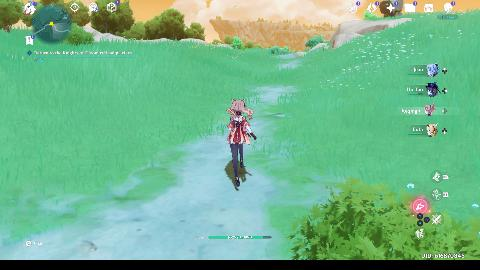

(270, 480, 3)

In [258]:
showarray(X_image[0])
X_image[0].shape 

We should **modify** al the whole neural network!

# Modified version of AlexNet - Adapted version

Let us write the parameters Alexnet network in asimple code

In [44]:
parameters={}

#Input layer
parameters[0]=270,480,3

#CONV 1
inputs  =parameters[0]  #nw x nh x nc image
kernel  = 11,11      #fw x fw  filter
stride  = 4.0      #stride s
padding = 0.0      #padding p
filters = 96       #number of filters ncl
parameters[1]=nparameters_convolution(inputs, kernel,stride,padding,filters)
#POOL1
inputs  = parameters[1][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[2]=dim_pool(inputs, kernel,stride,padding)
#CONVOLUTION SAME 1
inputs  =parameters[2][0] #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 2.0      #padding p
filters = 256       #number of filters ncl
parameters[3]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[3]) # Checking parameters of same convolution

#POOL2
inputs  = parameters[3][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[4]=dim_pool(inputs, kernel,stride,padding)

#CONVOLUTION SAME 2
inputs  =parameters[4][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
parameters[5]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[5]) # Checking parameters of same convolution


#CONVOLUTION SAME 3
inputs  =parameters[5][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 384       #number of filters ncl
parameters[6]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[6]) # Checking parameters of same convolution


#CONVOLUTION SAME 4
inputs  =parameters[6][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = 256       #number of filters ncl
parameters[7]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[7]) # Checking parameters of same convolution

#POOL3
inputs  = parameters[7][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[8]=dim_pool(inputs, kernel,stride,padding)
#FC1
parameters[9]=nparameters_fully_connected(4096 , parameters[8][1])
#FC2
parameters[10]=nparameters_fully_connected(parameters[9][1] , parameters[9][1])
#Softmax
parameters[11]=nparameters_fully_connected(29 , parameters[10][1])

Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters


In [45]:
print("Operation,","Activation Shape,", "Activation Size,","#Parameters")
for i in range(12):
    step=i
    layer=parameters[step]
    print(step, layer)

Operation, Activation Shape, Activation Size, #Parameters
0 (270, 480, 3)
1 ((65, 118, 96), 736320, 34944)
2 ((32, 58, 96), 178176, 0)
3 ((32, 58, 256), 475136, 614656)
4 ((15, 28, 256), 107520, 0)
5 ((15, 28, 384), 161280, 885120)
6 ((15, 28, 384), 161280, 1327488)
7 ((15, 28, 256), 107520, 884992)
8 ((7, 13, 256), 23296, 0)
9 ((4096, 1), 4096, 95424512)
10 ((4096, 1), 4096, 16781312)
11 ((29, 1), 29, 118813)


Meanwhile the orginal AlexNet calculation contains
```
Operation, Activation Shape, Activation Size, #Parameters
0 (227, 227, 3)
1 ((55, 55, 96), 290400, 34944)
2 ((27, 27, 96), 69984, 0)
3 ((27, 27, 256), 186624, 614656)
4 ((13, 13, 256), 43264, 0)
5 ((13, 13, 384), 64896, 885120)
6 ((13, 13, 384), 64896, 1327488)
7 ((13, 13, 256), 43264, 884992)
8 ((6, 6, 256), 9216, 0)
9 ((4096, 1), 4096, 37752832)
10 ((4096, 1), 4096, 16781312)
11 ((1000, 1), 1000, 4097000)
```

The previous results shows how we should modify all the layers in an appropiate way if we want to follow the same structure of the AlexNet

In ordering to improve the Neural Network we can take into account the following best practices:
- Is the network size is too small / large?
- Check overfitting or underfitting by train history, then chose the best epoch size.
- Try initialise weights with different initialization scheme.
- Try different activation functions, loss function, optimizer.
- **Change layers number and units number**.
- Change batch size.
- Add dropout layer.

Among the best practices mentioned before , we will take into account "Change layers number and units number." Because the original AlexNet were developed taking into account **1000 classes** insted we have only **29 classes** and then does not makes any sense keep the same number of units.

In [4]:
#Normalization Parameter
Norma        = 29/1000

In [5]:
#round a float up to next even number
import math

def roundeven(f):
    return math.ceil(f / 2.) * 2

In [51]:
roundeven(96*Norma)

4

In [52]:
roundeven(256*Norma)

8

In [53]:
roundeven(384*Norma) 

12

In [54]:
roundeven(4096*Norma) 

120

In [55]:
roundeven(1000*Norma) 

30

In [64]:
parameters={}

#Input layer
parameters[0]=270,480,3

#CONV 1
inputs  =parameters[0]  #nw x nh x nc image
kernel  = 11,11      #fw x fw  filter
stride  = 4.0      #stride s
padding = 0.0      #padding p
filters = roundeven(96*Norma)       #number of filters ncl
parameters[1]=nparameters_convolution(inputs, kernel,stride,padding,filters)
#POOL1
inputs  = parameters[1][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[2]=dim_pool(inputs, kernel,stride,padding)
#CONVOLUTION SAME 1
inputs  =parameters[2][0] #nw x nh x nc image
kernel  = 5,5      #fw x fw  filter
stride  = 1.0      #stride s
padding = 2.0      #padding p
filters = roundeven(256*Norma)      #number of filters ncl
parameters[3]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[3]) # Checking parameters of same convolution

#POOL2
inputs  = parameters[3][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[4]=dim_pool(inputs, kernel,stride,padding)

#CONVOLUTION SAME 2
inputs  =parameters[4][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = roundeven(384*Norma)        #number of filters ncl
parameters[5]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[5]) # Checking parameters of same convolution


#CONVOLUTION SAME 3
inputs  =parameters[5][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = roundeven(384*Norma)         #number of filters ncl
parameters[6]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[6]) # Checking parameters of same convolution


#CONVOLUTION SAME 4
inputs  =parameters[6][0] #nw x nh x nc image
kernel  = 3,3      #fw x fw  filter
stride  = 1.0      #stride s
padding = 1.0      #padding p
filters = roundeven(256*Norma)       #number of filters ncl
parameters[7]=nparameters_convolution(inputs, kernel,stride,padding,filters)
check_same(inputs,parameters[7]) # Checking parameters of same convolution

#POOL3
inputs  = parameters[7][0] #nw x nh x nc 
kernel  = 3,3     #fw x fw  filter
stride  = 2.0      #stride s
padding = 0.0      #padding p
parameters[8]=dim_pool(inputs, kernel,stride,padding)
#FC1
parameters[9]=nparameters_fully_connected(roundeven(4096*Norma)  , parameters[8][1])
#FC2
parameters[10]=nparameters_fully_connected(parameters[9][1] , parameters[9][1])
#Softmax
parameters[11]=nparameters_fully_connected(int(1000*Norma)  , parameters[10][1])

Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters
Activation Shape, Activation Size, # Parameters


In [65]:
print("Operation,","Activation Shape,", "Activation Size,","#Parameters")
for i in range(12):
    step=i
    layer=parameters[step]
    print(step, layer)

Operation, Activation Shape, Activation Size, #Parameters
0 (270, 480, 3)
1 ((65, 118, 4), 30680, 1456)
2 ((32, 58, 4), 7424, 0)
3 ((32, 58, 8), 14848, 808)
4 ((15, 28, 8), 3360, 0)
5 ((15, 28, 12), 5040, 876)
6 ((15, 28, 12), 5040, 1308)
7 ((15, 28, 8), 3360, 872)
8 ((7, 13, 8), 728, 0)
9 ((120, 1), 120, 87480)
10 ((120, 1), 120, 14520)
11 ((29, 1), 29, 3509)


First let us define all the parameters of AlexNet adapted 

In [6]:
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)    #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

dropout13=0.5
dropout15=0.5
learning_rate17=0.001



In [7]:
def alexnet_adapted(width, height, lr, output=29):
    # Building 'AlexNet'                                                               #line
    network = input_data(shape=[None, width, height, 3])                               #0
    network = conv_2d(network, filters1, kernel1, stride1, activation='relu')          #1
    network = max_pool_2d(network, kernel2, strides=stride2 )                          #2
    network = local_response_normalization(network)                                    #3
    network = conv_2d(network, filters3 , kernel3 , activation='relu')                 #4
    network = max_pool_2d(network, kernel4, strides=stride4)                           #5
    network = local_response_normalization(network)                                    #6
    network = conv_2d(network, filters5 , kernel5 , activation='relu')                 #7
    network = conv_2d(network, filters6 , kernel6 , activation='relu')                 #8
    network = conv_2d(network, filters7, kernel7 , activation='relu')                  #9
    network = max_pool_2d(network, kernel8 , strides=stride8 )                         #10
    network = local_response_normalization(network)                                    #11
    network = fully_connected(network, activation9, activation='tanh')                 #12
    network = dropout(network, dropout13)                                              #13
    network = fully_connected(network, activation10, activation='tanh')                #14
    network = dropout(network, dropout15)                                              #15
    network = fully_connected(network, outputs11, activation='softmax')                #16
    network = regression(network, optimizer='momentum',                                #17
                         loss='categorical_crossentropy',
                         learning_rate=learning_rate17)

    # Training
    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

**Learning rate** 
The learning rate defines how quickly a network updates its parameters.

Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge.

Usually a decaying Learning rate is preferred.

**Momentum**
Momentum helps to know the direction of the next step with the knowledge of the previous steps. It helps to prevent oscillations. A typical choice of momentum is between 0.5 to 0.9.

**Number of epochs**
Number of epochs is the number of times the whole training data is shown to the network while training.

Increase the number of epochs until the validation accuracy starts decreasing even when training accuracy is increasing(overfitting).

**Batch size**
Mini batch size is the number of sub samples given to the network after which parameter update happens.


The activation function is a node that is put at the end of or in between Neural Networks. The activation function is the non linear transformation that we do over the input signal. This transformed output is then sent to the next layer of neurons as input.

A good default for batch size might be 32. Also try 32, 64, 128, 256, and so o

The adapted version of the AlexNet model does not modify the latest size of the neural net.

In [9]:
LR = 1e-3
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex-adaptedd') 
MODEL_NAME

'mmorpg-0.001-alex-adaptedd.model'

In [10]:
model = alexnet_adapted(WIDTH, HEIGHT, LR, output=29)

We train the modifed  model

In [11]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=64, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 15  | total loss: 5.73289 | time: 0.314s
| Momentum | epoch: 005 | loss: 5.73289 - acc: 0.7145 -- iter: 180/180


In [12]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=256, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 20  | total loss: 4.97291 | time: 0.406s
| Momentum | epoch: 010 | loss: 4.97291 - acc: 0.7783 -- iter: 180/180


In [13]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=512, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 25  | total loss: 3.99376 | time: 0.332s
| Momentum | epoch: 015 | loss: 3.99376 - acc: 0.8277 -- iter: 180/180


In [14]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=1024, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 30  | total loss: 3.01139 | time: 0.293s
| Momentum | epoch: 020 | loss: 3.01139 - acc: 0.8259 -- iter: 180/180


In [15]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=1024*2, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 35  | total loss: 2.26618 | time: 0.277s
| Momentum | epoch: 025 | loss: 2.26618 - acc: 0.7786 -- iter: 180/180


In [16]:
model.fit(X, Y, n_epoch=5, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=1024*3, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 40  | total loss: 1.85039 | time: 1.440s
| Momentum | epoch: 030 | loss: 1.85039 - acc: 0.6351 -- iter: 180/180


In [20]:
model.fit(X, Y, n_epoch=15, validation_set=0.1, shuffle=True,
              show_metric=True, batch_size=1024*3, snapshot_step=200,
              snapshot_epoch=False, run_id=MODEL_NAME)

Training Step: 70  | total loss: 1.42784 | time: 0.364s
| Momentum | epoch: 060 | loss: 1.42784 - acc: 0.5493 -- iter: 180/180


https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://stackoverflow.com/questions/38968249/cannot-run-tflearn-with-sklearns-gridsearchcv

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [25]:
#from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
import tflearn
import tflearn.datasets.mnist as mnist


In [26]:
x_train, y_train, x_test, y_test = mnist.load_data(one_hot=False)
#Build the model, select the kernel function and train
clf = SVC()
clf.set_params(kernel='rbf', probability=True).fit(x_train[:1000,:], y_train[:1000])
preds1 = clf.predict(x_test[:1000,:])
print(":"+str(np.mean(preds1 == y_test[:1000])))

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
:0.89


In [28]:
#Set the parameters to be transformed
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}    


In [29]:
#Build an automatic parameter tuning container, the n_jobs parameter supports multiple processes running parallel tests at the same time
grid_search = GridSearchCV(clf, param_grid, n_jobs = 1, verbose=10)    

In [30]:
grid_search.fit(x_train[:1000,:], y_train[:1000])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START C=0.0001, gamma=0.001......................................
[CV 1/5; 1/16] END .......C=0.0001, gamma=0.001;, score=0.115 total time=   1.1s
[CV 2/5; 1/16] START C=0.0001, gamma=0.001......................................
[CV 2/5; 1/16] END .......C=0.0001, gamma=0.001;, score=0.115 total time=   1.0s
[CV 3/5; 1/16] START C=0.0001, gamma=0.001......................................
[CV 3/5; 1/16] END .......C=0.0001, gamma=0.001;, score=0.115 total time=   1.0s
[CV 4/5; 1/16] START C=0.0001, gamma=0.001......................................
[CV 4/5; 1/16] END .......C=0.0001, gamma=0.001;, score=0.115 total time=   1.1s
[CV 5/5; 1/16] START C=0.0001, gamma=0.001......................................
[CV 5/5; 1/16] END .......C=0.0001, gamma=0.001;, score=0.115 total time=   1.1s
[CV 1/5; 2/16] START C=0.0001, gamma=0.0001.....................................
[CV 1/5; 2/16] END ......C=0.0001, gamma=0.0001;

[CV 1/5; 11/16] END ..........C=10, gamma=0.001;, score=0.860 total time=   0.4s
[CV 2/5; 11/16] START C=10, gamma=0.001.........................................
[CV 2/5; 11/16] END ..........C=10, gamma=0.001;, score=0.880 total time=   0.4s
[CV 3/5; 11/16] START C=10, gamma=0.001.........................................
[CV 3/5; 11/16] END ..........C=10, gamma=0.001;, score=0.910 total time=   0.4s
[CV 4/5; 11/16] START C=10, gamma=0.001.........................................
[CV 4/5; 11/16] END ..........C=10, gamma=0.001;, score=0.890 total time=   0.4s
[CV 5/5; 11/16] START C=10, gamma=0.001.........................................
[CV 5/5; 11/16] END ..........C=10, gamma=0.001;, score=0.910 total time=   0.4s
[CV 1/5; 12/16] START C=10, gamma=0.0001........................................
[CV 1/5; 12/16] END .........C=10, gamma=0.0001;, score=0.795 total time=   0.8s
[CV 2/5; 12/16] START C=10, gamma=0.0001........................................
[CV 2/5; 12/16] END ........

GridSearchCV(estimator=SVC(probability=True), n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.0001]},
             verbose=10)

In [31]:
#Select the best parameters
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)
#train with optimal parameters
clf = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True).fit(x_train[:1000,:], y_train[:1000])
preds1 = clf.predict(x_test[:1000,:])
print("Optimal test set validation score"+str(np.mean(preds1 == y_test[:1000])))

C 100
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.001
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False
0.878
